In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
%matplotlib inline

## 加载数据

In [3]:
img = plt.imread("data/number_data/9/9_1.bmp")

In [4]:
img.shape

(28, 28)

In [5]:
img[:2]

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255]], dtype=uint8)

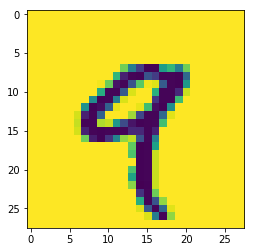

In [6]:
plt.imshow(img)

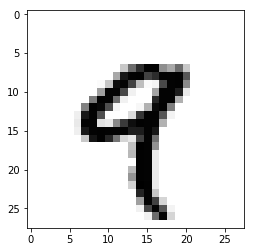

In [7]:
# 使用黑白的
plt.imshow(img, cmap=plt.cm.gray)

In [8]:
# 文件名例如：9_1.bmp
datas = []
y = []

In [9]:
for parent,dirs,names in os.walk("data/number_data"):
    for filename in names:
        if ".bmp" not in filename:
            continue
        label = int(filename.split("_")[0])
        path = os.path.join(parent,filename) #路径和文件名连接构成完整路径
        data = plt.imread(path)
        datas.append(data)
        y.append(label)

In [10]:
len(datas), len(y)

(5000, 5000)

In [11]:
data = np.array(datas)
y = np.array(y)

data.shape, y.shape

((5000, 28, 28), (5000,))

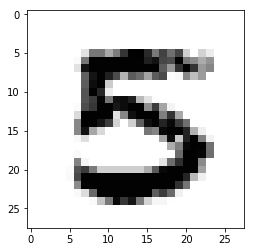

In [12]:
plt.imshow(data[7 + 500 * 5], cmap=plt.cm.gray)

In [13]:
X = data.reshape(5000, -1)
X.shape

(5000, 784)

In [14]:
y

array([0, 0, 0, ..., 9, 9, 9])

## 使用模型预测
**由于X的个列值的范围都一样，可以不进行归一化。**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 784), (1000, 784), (4000,), (1000,))

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

knn.score(X_test, y_test)

0.931

In [19]:
pd.value_counts(y_predict == y_test)

True     931
False     69
dtype: int64

In [20]:
# 准确率
(y_predict == y_test).mean()

0.931

**使用网格搜索**

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
estimator = KNeighborsClassifier()

params = {"n_neighbors":[4,5,6,7], "weights":["uniform","distance"]}

gs = GridSearchCV(estimator=estimator, param_grid=params, cv=5)

gs.fit(X_train, y_train)

gs.score(X_test, y_test)

0.939

In [23]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [27]:
gs.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [24]:
gs.best_estimator_.score(X_test, y_test)

0.939

In [25]:
knn = KNeighborsClassifier(n_neighbors=5, weights="distance")

knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

knn.score(X_test, y_test)

0.937

In [26]:
# 和gs.best_estimator_一样
knn = KNeighborsClassifier(n_neighbors=4, weights="distance")

knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

knn.score(X_test, y_test)

0.939